# Redes Neurais Artificiais 2024.1


## Implementação de Redes Neurais com Sci-Kit Learn

* Professora: Elloá B. Guedes (ebgcosta@uea.edu.br)
* Aluno: Kirk Matos Isaac Sahdo (kmis.eng21@uea.edu.br)


### Contexto: Consumo de Combustível

O objetivo desta atividade prática é utilizar as ferramentas de Machine Learning no ambiente Python com o uso das bibliotecas pandas e sci-kit learn para prever o consumo de combustível de veículos.

### Base de Dados

Disponível em: https://archive.ics.uci.edu/ml/datasets/auto+mpg

### Bibliotecas

Por hábito, a primeira célula do notebook costuma ser reservada para importação de bibliotecas.
A cada biblioteca nova acrescida, é necessário executar a célula para atualização e correta execução.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.neural_network import MLPClassifier, MLPRegressor

### Abertura do Dataset

Abra o dataset e visualize o seu cabeçalho, isto é, os primeiros exemplos nele contidos.
Isto é útil para checar se a importação foi realizada de maneira adequada e se a disposição dos dados está de acordo para os próximos passos do trabalho.

In [2]:
data_set_path = "autompg.csv"
data = pd.read_csv(data_set_path, sep=';')
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,modelyear,origin,name
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0,chevrolet chevelle malibu
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1.0,buick skylark 320
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,1.0,plymouth satellite
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,1.0,amc rebel sst
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,1.0,ford torino


### Conhecendo o dataset

Para praticar conceitos relativos à exploração do conjunto de dados, utilize as células a seguir para prover respostas para as seguintes perguntas:

1. Quantos exemplos há no dataset?
2. Quais os atributos existentes no dataset?
3. Quais os nomes dos carros existentes no dataset?
4. Quais as características do 'chevrolet camaro'?
5. Qual a média de consumo, em galões por litro, dos carros existentes no dataset?

In [3]:
data_size = len(data)
data_size

406

In [4]:
attributes = data.columns.tolist()
attributes

['mpg',
 'cylinders',
 'displacement',
 'horsepower',
 'weight',
 'acceleration',
 'modelyear',
 'origin',
 'name']

In [5]:
data_names = data['name'].unique()
", ".join(data_names)

"chevrolet chevelle malibu, buick skylark 320, plymouth satellite, amc rebel sst, ford torino, ford galaxie 500, chevrolet impala, plymouth fury iii, pontiac catalina, amc ambassador dpl, citroen ds-21 pallas, chevrolet chevelle concours (sw), ford torino (sw), plymouth satellite (sw), amc rebel sst (sw), dodge challenger se, plymouth 'cuda 340, ford mustang boss 302, chevrolet monte carlo, buick estate wagon (sw), toyota corona mark ii, plymouth duster, amc hornet, ford maverick, datsun pl510, volkswagen 1131 deluxe sedan, peugeot 504, audi 100 ls, saab 99e, bmw 2002, amc gremlin, ford f250, chevy c20, dodge d200, hi 1200d, chevrolet vega 2300, toyota corona, ford pinto, volkswagen super beetle 117, plymouth satellite custom, ford torino 500, amc matador, pontiac catalina brougham, dodge monaco (sw), ford country squire (sw), pontiac safari (sw), amc hornet sportabout (sw), chevrolet vega (sw), pontiac firebird, ford mustang, mercury capri 2000, opel 1900, peugeot 304, fiat 124b, toyo

In [6]:
camaro_data = data[data['name'] == 'chevrolet camaro']
camaro_data

,mpg,cylinders,displacement,horsepower,weight,acceleration,modelyear,origin,name
400,27.0,4.0,151.0,90.0,2950.0,17.3,82.0,1.0,chevrolet camaro


In [7]:
# Como dentro do dataset o consumo está em mpg, devemos converté-lo para galões por litro
# gpl = 3.78541 / mpg
data['gpl'] = 3.78541 / data['mpg']
avg_gpl = data['gpl'].mean()
avg_gpl

0.18045655620744197

### Preparação dos dados

1. Existem exemplos com dados faltantes. Para fins de simplificação, elimine-os do dataset.
2. Exclua a coluna com os nomes dos carros
3. Converta mpg para km/l sabendo que: 1 mpg  = 0.425 km/l. Utilize apenas duas casas decimais nesta conversão.
4. Remova a coluna mpg e insira a coluna kml no dataset.

In [8]:
print(f"Tamanho antes da remoção dos exemplos com dados faltantes: {data_size}")
data = data.dropna()
data_size = len(data)
print(f"Novo tamanho: {data_size}")

Tamanho antes da remoção dos exemplos com dados faltantes: 406
Novo tamanho: 392


In [9]:
data = data.drop(columns=['name'])
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,modelyear,origin,gpl
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0,0.210301
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1.0,0.252361
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,1.0,0.210301
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,1.0,0.236588
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,1.0,0.222671


In [10]:
data['kml'] = (data['mpg'] * 0.425).round(2)
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,modelyear,origin,gpl,kml
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0,0.210301,7.65
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1.0,0.252361,6.38
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,1.0,0.210301,7.65
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,1.0,0.236588,6.80
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,1.0,0.222671,7.22


In [11]:
data = data.drop(columns=["mpg"])
data.head()

,cylinders,displacement,horsepower,weight,acceleration,modelyear,origin,gpl,kml
0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0,0.210301,7.65
1,8.0,350.0,165.0,3693.0,11.5,70.0,1.0,0.252361,6.38
2,8.0,318.0,150.0,3436.0,11.0,70.0,1.0,0.210301,7.65
3,8.0,304.0,150.0,3433.0,12.0,70.0,1.0,0.236588,6.80
4,8.0,302.0,140.0,3449.0,10.5,70.0,1.0,0.222671,7.22


### Organização dos dados para treinamento

1. Remova a coluna kml e atribua-a a uma variável Y
2. Atribua os demais valores do dataset a uma variável X
3. Efetue uma partição holdout 70/30 com o sklearn

In [12]:
X = data.drop('kml', axis=1)

In [13]:
Y = data['kml']

In [14]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30)

### Treinamento de um modelo de regressão linear

1. Importe o modelo da biblioteca sklearn
2. Instancie o modelo com parâmetros padrão (default)
3. Execute o algoritmo de treinamento com os dados de treino

In [15]:
regr = LinearRegression()

# Train the model using the training sets
regr.fit(X_train, Y_train)

LinearRegression()

### Teste do modelo

Vamos observar a saída do modelo para um exemplo individual existente nos dados de treino:
* Atributos preditores: X_test[2:3]
* Atributo alvo: Y_test.iloc[2]
* Qual o resultado previsto para o modelo, dados estes atributos preditores?

In [16]:
predictive_attributes = X_test.iloc[2:3]
target_attribute = Y_test.iloc[2]

result = regr.predict(predictive_attributes)

print(f"Atributos preditores: \n{predictive_attributes}")
print(f"Atributo alvo verdadeiro: {target_attribute}")
print(f"Resultado previsto pelo modelo: {result[0]}")

Atributos preditores: 
     cylinders  displacement  horsepower  weight  acceleration  modelyear  \
308        4.0         105.0        70.0  2200.0          13.2       79.0   

     origin       gpl  
308     1.0  0.110685  
Atributo alvo verdadeiro: 14.54
Resultado previsto pelo modelo: 12.53104706281386


### Teste do modelo

1. Obtenha o R^2 para os dados de teste
 * Efetue a importação de r2_score do pacote sklearn.metrics
 * Trata-se de um valor no intervalo [0,1]
 * Quanto mais próximo de 1, melhor é o modelo

In [17]:
Y_pred = regr.predict(X_test)

In [18]:
r2 = r2_score(Y_test, Y_pred)
r2

0.8910898183913575

### Obtendo e visualizando os resíduos

Uma maneira muito comum de visualizarmos o quão bom certo modelo é para aprender determinados padrões dá-se por meio da visualização dos resíduos, isto é, da diferença entre os valores previstos e observados. Adapte o código a seguir para calcular os resíduos produzidos pelo seu modelo.

In [19]:
residuos = []
for (x,y) in zip(Y_test,Y_pred):
    residuos.append((x-y)**2)
residuos

[0.044965292079354124,
 0.13080480016406124,
 4.035891903828809,
 0.9682217971926725,
 0.4531557296733789,
 4.332740464016709,
 2.949409828424917,
 1.2521024688764955,
 3.63652012634352,
 0.10139236873845593,
 0.9262308956884113,
 0.38732981847906506,
 0.18711708446201897,
 0.04275878048191099,
 0.006949215919495587,
 1.162383778345919,
 3.6582723592234494,
 7.956775304393982e-05,
 0.11472031944174475,
 0.35733871302605336,
 0.2911233680657573,
 0.2996427105221131,
 0.0020338931845985137,
 0.2667471838489184,
 0.4102246823251022,
 0.01601064193670657,
 0.27821047598812493,
 0.012926356850440156,
 0.04877509917638604,
 1.0168376258123364,
 0.7827172799088675,
 1.0775081095582841,
 0.09173149515247044,
 0.023500720864090087,
 0.10318755127928475,
 0.3061283417832245,
 2.3883948942563116,
 0.05601677591519294,
 0.09296954792647738,
 0.07701113728566465,
 2.9908307278704807,
 2.27648384786329,
 9.591858417442453e-05,
 5.2509156439705205,
 1.701075630743955,
 0.6212885608925676,
 0.53919615

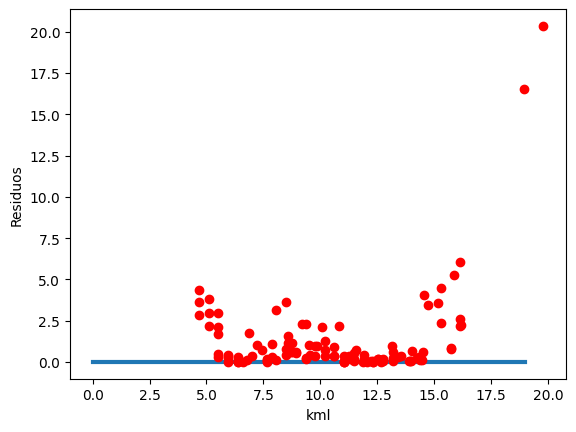

In [20]:
Y_test_np = np.array(Y_test)
residuos_np = np.array(residuos)

x = [0,int(max(Y_test))]
y = [0,0]
plt.plot(x,y,linewidth=3)
plt.plot(Y_test_np, residuos_np,'ro')
plt.ylabel('Residuos')
plt.xlabel('kml')
plt.show()

## Propondo RNAs MLP

### Escalonando os atributos

O treinamento de uma rede neural artificial é mais eficiente quando os valores que lhes são fornecidos como entrada são pequenos, pois isto favorece a convergência. Isto é feito escalonando todos os atributos para o intervalo [0,1], mas precisa ser feito de maneira cautelosa, para que informações do conjunto de teste não sejam fornecidas no treinamento.

Há duas estratégias para tal escalonamento: normalização e padronização. Ambas possuem características particulares, vantagens e limitações, como é possível ver aqui: https://www.analyticsvidhya.com/blog/2020/04/feature-scaling-machine-learning-normalization-standardization/

No nosso caso, vamos usar a padronização. Assim, com os atributos preditores do treinamento, isto é, X_train, deve-se subtrair a média e dividir pelo desvio padrão:

X_train_std = (X_train - np.mean(X_train))/np.std(X_train)

Em seguida, o mesmo deve ser feito com os atributos preditores do conjunto de testes, mas com padronização relativa ao conjunto de treinamento:

X_test_std = (X_test - np.mean(X_train))/np.std(X_train)

Se todo o conjunto X for utilizado na padronização, a rede neural receberá informações do conjunto de teste por meio da média e variância utilizada para preparar os dados de treinamento, o que não é desejável.


### Proposição de uma RNA MLP de Camada Única

1. Consulte a documentação em https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html
2. Treine uma rede neural multilayer perceptron para este problema com uma única camada e dez neurônios  
    2.1 Utilize a função de ativação ReLU  
    2.2 Utilize o solver Adam    
    2.3 Imprima o passo a passo do treinamento    
    2.4 Utilize o número máximo de épocas igual a 300
3. Obtenha o $R^2$ do conjunto de testes

In [21]:
X_train_std = (X_train - X_train.mean()) / X_train.std()
X_test_std = (X_test - X_train.mean()) / X_train.std()

mlp = MLPRegressor(hidden_layer_sizes=(10,), activation='relu', solver='adam', max_iter=300, verbose=True)
mlp.fit(X_train_std, Y_train)

Y_pred = mlp.predict(X_test_std)

r2 = r2_score(Y_test, Y_pred)
r2

Iteration 1, loss = 48.15054583
Iteration 2, loss = 47.91802039
Iteration 3, loss = 47.68224676
Iteration 4, loss = 47.44984063
Iteration 5, loss = 47.21834355
Iteration 6, loss = 46.99353183
Iteration 7, loss = 46.76460191
Iteration 8, loss = 46.53798440
Iteration 9, loss = 46.30182069
Iteration 10, loss = 46.07860937
Iteration 11, loss = 45.84964792
Iteration 12, loss = 45.62129087
Iteration 13, loss = 45.38660649
Iteration 14, loss = 45.16429948
Iteration 15, loss = 44.93281966
Iteration 16, loss = 44.70547379
Iteration 17, loss = 44.47656129
Iteration 18, loss = 44.25198386
Iteration 19, loss = 44.02138561
Iteration 20, loss = 43.79349720
Iteration 21, loss = 43.55986215
Iteration 22, loss = 43.33641289
Iteration 23, loss = 43.10113166
Iteration 24, loss = 42.87193495
Iteration 25, loss = 42.63932218
Iteration 26, loss = 42.40414289
Iteration 27, loss = 42.17414011
Iteration 28, loss = 41.93642908
Iteration 29, loss = 41.70063203
Iteration 30, loss = 41.46708448
Iteration 31, loss 

c:\users\ayato\appdata\local\programs\python\python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


0.29601145385763816

### Proposição de uma RNA MLP com duas camadas ocultas

1. Treine uma rede neural multilayer perceptron para este problema com duas camadas ocultas, com número de neurônios à sua escolha  
    2.1 Utilize a função de ativação ReLU  
    2.2 Utilize o solver Adam    
    2.3 Imprima o passo a passo do treinamento    
    2.4 Utilize o número máximo de épocas igual a 300
2. Obtenha o $R^2$ do conjunto de testes

In [22]:
mlp = MLPRegressor(hidden_layer_sizes=(50, 20), activation='relu', solver='adam', max_iter=300, verbose=True)
mlp.fit(X_train_std, Y_train)

Y_pred = mlp.predict(X_test_std)

r2 = r2_score(Y_test, Y_pred)
r2

Iteration 1, loss = 56.55382185
Iteration 2, loss = 55.84397795
Iteration 3, loss = 55.18975483
Iteration 4, loss = 54.55916881
Iteration 5, loss = 53.95162908
Iteration 6, loss = 53.37075634
Iteration 7, loss = 52.80174741
Iteration 8, loss = 52.23482992
Iteration 9, loss = 51.68051415
Iteration 10, loss = 51.14042370
Iteration 11, loss = 50.59448202
Iteration 12, loss = 50.06160649
Iteration 13, loss = 49.51292967
Iteration 14, loss = 48.96290204
Iteration 15, loss = 48.38426799
Iteration 16, loss = 47.78728328
Iteration 17, loss = 47.16593481
Iteration 18, loss = 46.51471987
Iteration 19, loss = 45.82009228
Iteration 20, loss = 45.07198272
Iteration 21, loss = 44.24123736
Iteration 22, loss = 43.36760173
Iteration 23, loss = 42.42183536
Iteration 24, loss = 41.45990380
Iteration 25, loss = 40.47904318
Iteration 26, loss = 39.41574928
Iteration 27, loss = 38.41363490
Iteration 28, loss = 37.33833460
Iteration 29, loss = 36.25093783
Iteration 30, loss = 35.13808493
Iteration 31, loss 

c:\users\ayato\appdata\local\programs\python\python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


0.9187900192283507

### Para Discussão

- Qual melhor modelo para este problema?

O melhor modelo para um problema depende de fatores como coeficiente de determinação ($R^2$), complexidade e interpretabilidade. A partir da análise desses valores, podemos concluir que a regressão linear tem um valor de 0.898, enquanto o MLP de camada única tem desempenho pior. Portanto, o MLP com duas camadas ocultas chega em 0.948, mas é mais complexo. O modelo MLP com duas camadas ocultas é o mais adequado, capturando melhor os padrões.